# Data Visualisation and Communication - CA2
<p>Students: Luciana Teixeira / Marcelle Louise</p>



In [1]:
# Importing the libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") #This command ignores the warning - second plot
from __future__  import print_function #adds compatibility with new versions of Python
%matplotlib inline 

#it needs to have two underscore for 'future', if not it throws an error: 
#ModuleNotFoundError: No module named '_future_'

In [2]:
#Importing the dataset

#The movies in the dataset were released before 2021. 
#Among the data points are movie titles, release dates (year), genre, duration, country of origin (or where movie was filmed), directors, actors, average vote, public vote, critic vote, total vote, description, etc. 
#Ratings are on a scale of 1 to 10 and have been obtained from the website Filmtv.it. 

#The dataset chosen for this project is Films and Movies. 

dataset = pd.read_csv('/Users/lucianateixeira/Desktop/BsC Computer Science  /Data visualisation and Communication/film_movies.csv')

In [3]:
#This line defines the type of the chosen dataset
type(dataset)

pandas.core.frame.DataFrame

In [4]:
#Visualise the first rows of the file
#dataset.head(number of rows you want to see)
#dataset.head(50) - for example

dataset.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,21,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,14,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


In [5]:
#Printing the dataset information

print(dataset.head())

   filmtv_id                                        title  year      genre  \
0          2  Bugs Bunny's Third Movie: 1001 Rabbit Tales  1982  Animation   
1          3                    18 anni tra una settimana  1991      Drama   
2         17                             Ride a Wild Pony  1976   Romantic   
3         18                                        Diner  1982     Comedy   
4         20              A che servono questi quattrini?  1942     Comedy   

   duration        country                             directors  \
0        76  United States  David Detiege, Art Davis, Bill Perez   
1        98          Italy                         Luigi Perelli   
2        91  United States                           Don Chaffey   
3        95  United States                        Barry Levinson   
4        85          Italy                        Esodo Pratelli   

                                              actors  avg_vote  critics_vote  \
0                                         

In [6]:
#Checking the number of columns and observations to meet assessment criteria

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37711 entries, 0 to 37710
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     37711 non-null  int64  
 1   title         37711 non-null  object 
 2   year          37711 non-null  int64  
 3   genre         37623 non-null  object 
 4   duration      37711 non-null  int64  
 5   country       37702 non-null  object 
 6   directors     37682 non-null  object 
 7   actors        35843 non-null  object 
 8   avg_vote      37711 non-null  float64
 9   critics_vote  33626 non-null  float64
 10  public_vote   37492 non-null  float64
 11  total_votes   37711 non-null  int64  
 12  description   36320 non-null  object 
 13  notes         18105 non-null  object 
 14  humor         37711 non-null  int64  
 15  rhythm        37711 non-null  int64  
 16  effort        37711 non-null  int64  
 17  tension       37711 non-null  int64  
 18  erotism       37711 non-nu

In [7]:
#Confirming numbers of rows

print(len(dataset))

37711


In [8]:
#Confirming number of columns 

print(len(dataset.columns))

19


In [9]:
#Another possible command to check this 

print(dataset.shape)

(37711, 19)


In [10]:
#This line defines the data type
dataset.dtypes

filmtv_id         int64
title            object
year              int64
genre            object
duration          int64
country          object
directors        object
actors           object
avg_vote        float64
critics_vote    float64
public_vote     float64
total_votes       int64
description      object
notes            object
humor             int64
rhythm            int64
effort            int64
tension           int64
erotism           int64
dtype: object

**Visualisation 1:** This shows the relation between movie genres and the public vote. 
The bar plot indicates the popularity of the genres. Here, it shows Drama is the most popular movie, followed by Comedy and Thriller; the least favourite genres are Sport, Biblical and Super-Hero. 

In [11]:
#Sort the dataframe with the 'public vote' column as reference using the 'sort_values' function
#The argument has to be set to'ascending' to 'False'
dataset = dataset.sort_values(by=['public_vote'],ascending=False)
dataset.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
12288,19598,Silvia e l'amore,1968,Documentary,87,Italy,Sergio Bergonzelli,"Angelo Infanti, Anna Maria Rosati, Ugo Adinolf...",6.5,3.0,10.0,3,"A young married couple, Silvia and Pierre, she...",Bergonzelli signs a kind of fake investigation...,0,2,0,1,2
11984,19126,Into the Arms of Danger,1997,Thriller,87,United States,Chuck Bowman,"Morgan Fairchild, Chandra West, Ricky Paull Go...",7.0,4.0,10.0,3,"Carly is a carefree teenager like many others,...",To poor Carly the Oscar for bad luck. It seems...,0,1,0,1,2
33845,144609,Tara moarta,2017,Documentary,88,Romania,Radu Jude,NaN,9.0,8.0,10.0,3,A collection of photographs of a small Romania...,NaN,0,0,0,0,0
28145,59538,Fanny,2013,Drama,102,France,Daniel Auteuil,"Raphaël Personnaz, Daniel Auteuil, Victoire Be...",9.0,8.0,10.0,3,"Fanny, in love and abandoned, discovers she ha...","Sequel to Marius (2013), inspired by the novel...",0,0,0,0,0
10495,16570,Deadly Family Secrets,1995,Drama,90,United States,Richard T. Heffron,"Greg Evigan, Loni Anderson, Gigi Rice, Barry C...",8.0,6.0,10.0,3,"Martha, while she is with her sister Linda, wh...",Well thought out and with solidly trained inte...,0,2,0,2,0


<AxesSubplot:title={'center':'Movie Genre'}, xlabel='genre', ylabel='public_vote'>

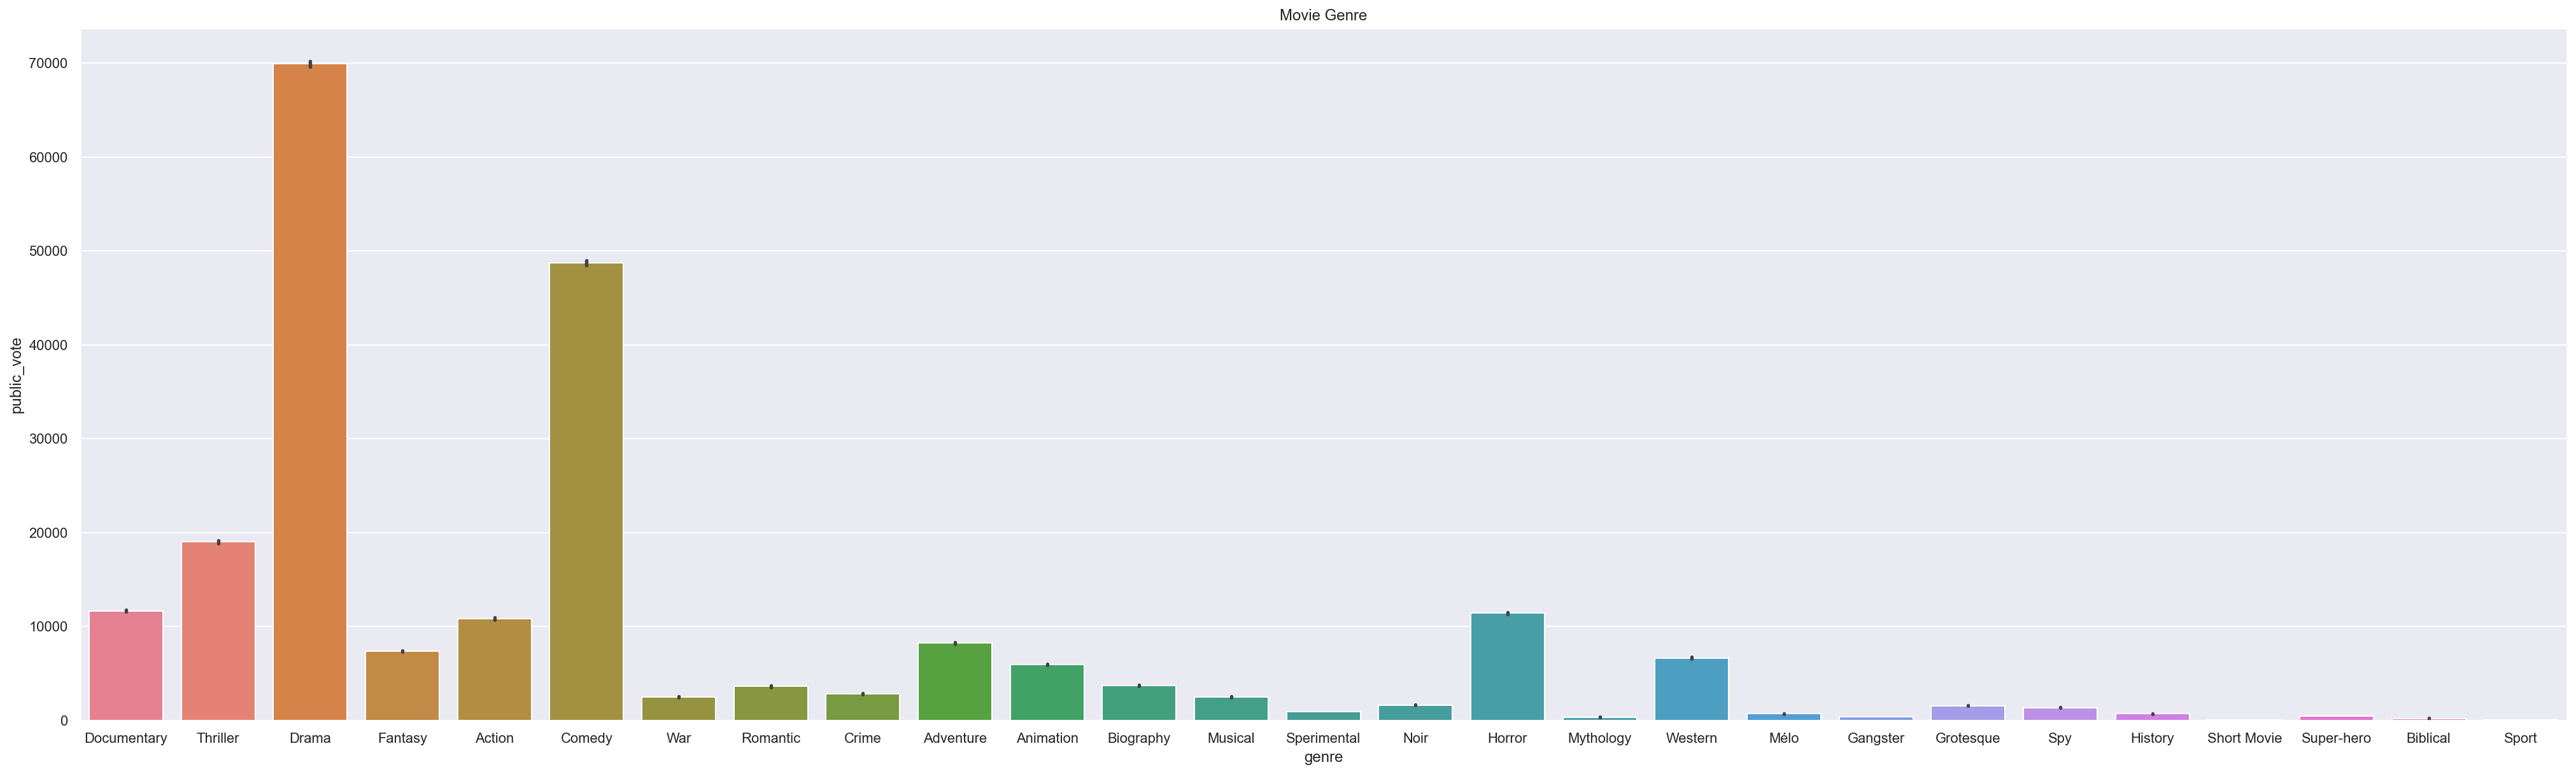

In [12]:
#Barplot shows the relationship between a numeric and a categoric variable. 
#Each entity of the categoric variable is represented as a bar. 
#The size of the bar represents its numeric value. 

%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook')
sns.set(rc={'figure.figsize':(35, 10)})
plt.title('Movie Genre')
sns.barplot(x="genre", y="public_vote", data=dataset, estimator=sum, palette="husl")



**Visualisation 2:** This plot shows the 10 top longest movies and it indicates that Die Zweite - Chronik einer Jugend is the first one. The Second Home - Chronicle of a Youth (in English) is from 1992 is the second part of the Heimat trilogy by the director Edgar Reitz. The film consists of 13 parts, the length of which is between 108 and 133 minutes.

In [13]:
# Sort data by the duration in descending order 
movie_duration = dataset.sort_values(by='duration', ascending=False) 

# Display the top 10 movies 
movie_duration.head(10)

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
17137,27984,Die Zweite Heimat - Chronik einer Jugend,1992,Drama,1525,Germany,Edgar Reitz,"Henry Arnold, Salome Kammer, Anke Sevenich, No...",9.3,9.25,9.0,19,NaN,NaN,1,2,3,2,1
19861,35625,Les Barbapapa,1973,Animation,1170,"Netherlands, Japan","Annette Tison, Talus Taylor",NaN,8.0,NaN,8.0,4,NaN,NaN,0,0,0,0,0
17136,27983,Heimat - Eine Chronik in elf Teilen,1984,Drama,924,Germany,Edgar Reitz,"Marita Breuer, Gertrud Bredel, Michael Lesch, ...",8.9,9.22,9.0,46,Made by Edgar Reitz Filmproduktion between 197...,NaN,1,2,4,2,1
26148,49977,The Story of Film: An Odyssey,2011,Documentary,900,Great Britain,Mark Cousins,NaN,8.2,8.40,8.0,47,Bringing the book of which he is the author to...,In the year in which The Artist triumphs at th...,2,1,4,1,0
35123,160375,La flor,2018,Sperimental,815,Argentina,Mariano Llinás,"Elisa Carricajo, Pilar Gamboa, Valeria Correa,...",8.9,8.50,9.0,5,"A film-tribute to the history of cinema, throu...",NaN,0,0,0,0,0
17138,27985,Out 1: Noli me tangere,1971,Drama,729,France,Jacques Rivette,"Pierre Baillot, Juliet Berto, Marcel Bonozet, ...",8.0,7.00,9.0,8,"In the Parisian off-theater environment, two d...",Fluviale (over 12 hours in total) monument of ...,0,1,4,1,0
28789,63245,The Untold History of the United States,2012,Documentary,713,United States,Oliver Stone,"Oliver Stone, Alan Shearman, Jim Ward, André S...",8.5,8.00,9.0,7,Narrated by Oliver Stone and written by the di...,NaN,0,0,0,0,0
31366,80848,Band of Brothers,2001,War,705,"Great Britain, United States","Phil Alden Robinson, Richard Loncraine, Mikael...","Scott Grimes, Matthew Leitch, Damian Lewis, Ro...",8.3,8.00,9.0,36,"World War II, 1942-1945. The story of the Easy...","Inspired by the book ""Band of Brothers: E Comp...",0,0,0,0,0
17276,28193,Heimat 3 - Chronik einer Zeitenwende,2004,Drama,680,Germany,Edgar Reitz,"Salome Kammer, Henry Arnold, Michael Kausch He...",8.1,8.50,8.0,15,"Film in six episodes. November 9, 1989: fall o...",Reitz greets the characters: he accompanies th...,1,2,3,2,1
25378,46371,Leningradskaja Retrospektiva 1957 - 1990,1990,Documentary,659,Soviet Union,Aleksandr Sokurov,NaN,7.6,7.00,8.0,6,A montage of newsreels made in Leningrad from ...,After being presented in 2008 at the Milanesia...,0,1,3,0,0


Text(0.5, 1.0, 'Top 10 longest movies')

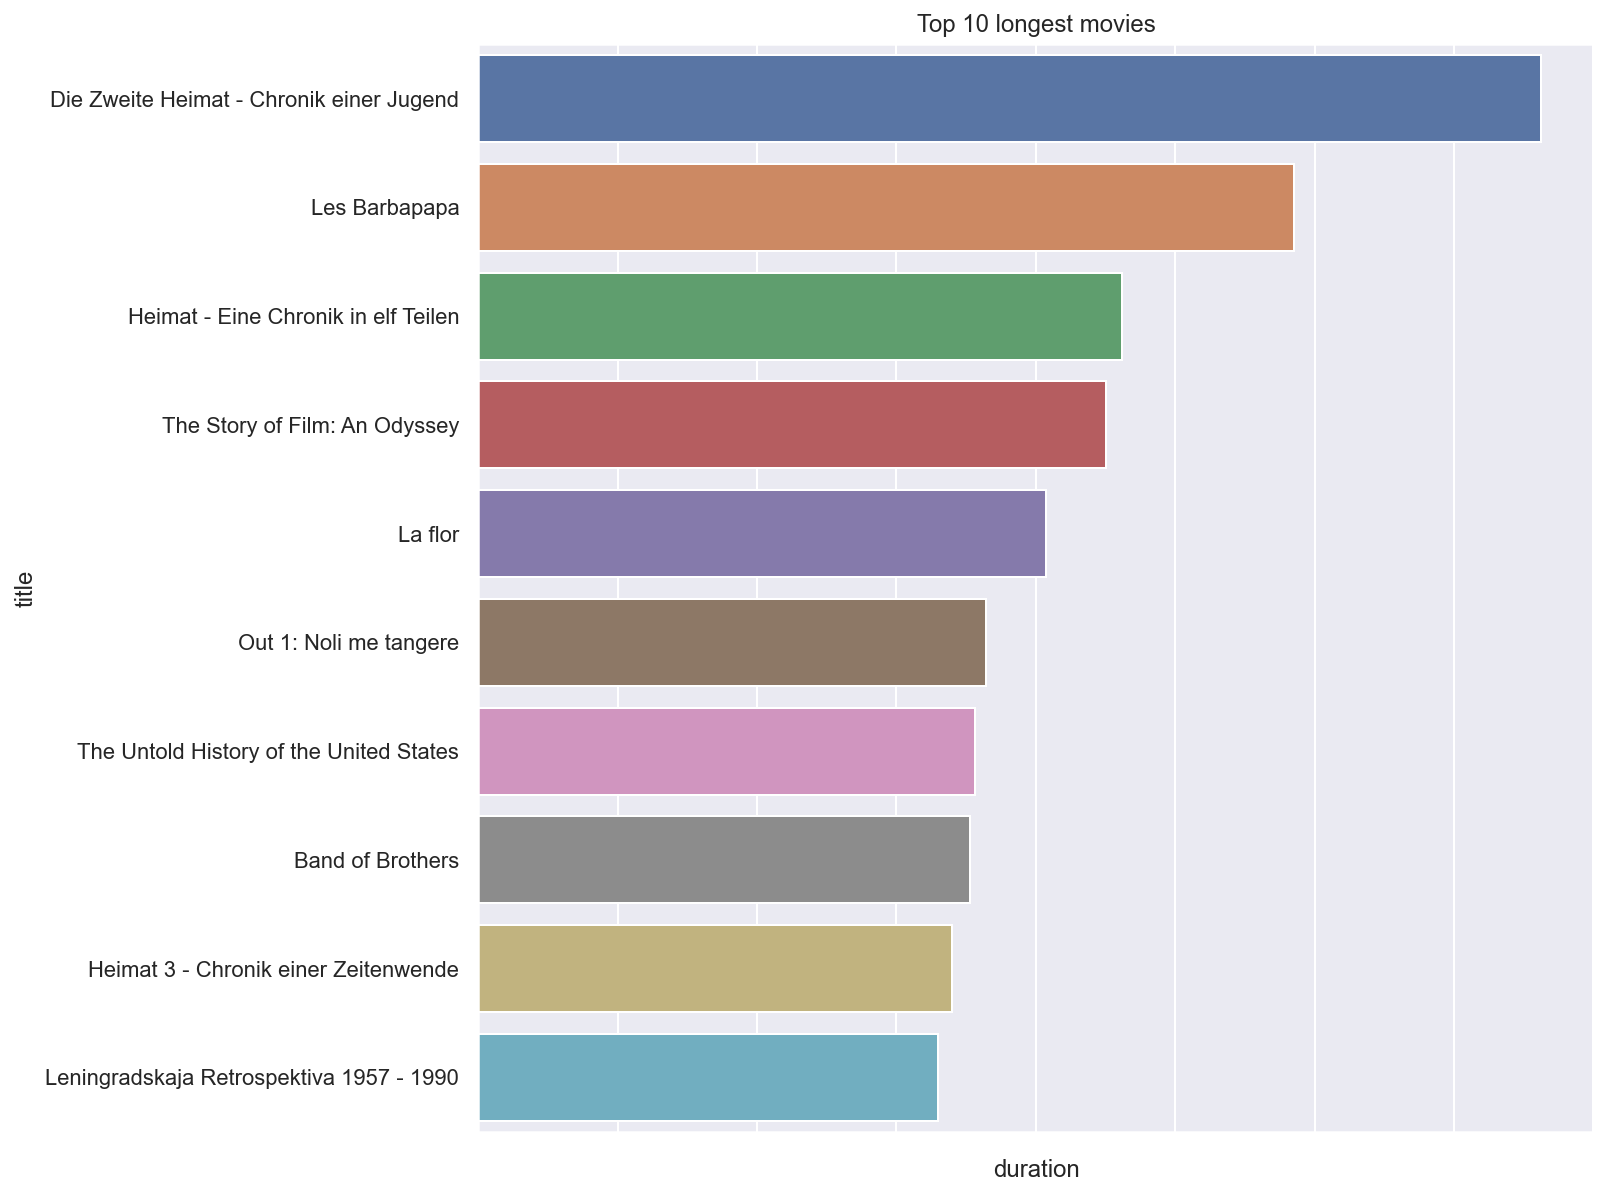

In [14]:
#Barchart shows the relationship between a numeric and a categoric variable. 
#Each entity of the categoric variable is represented as a bar. 
#The size of the bar represents its numeric value.

dur = movie_duration.head(10)
fig, ax = plt.subplots(figsize=(10,10)) 
chart = sns.barplot(x=dur.duration, y=dur.title)
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Top 10 longest movies')

**Visualisation 3:** This plot shows the genre trend over the years, it is indicated here that the outlier refers to Noir genre. 

Film Noir (literally 'black film" or "black cinema') was coined by French film critics (first by Nino Frank in 1946) who noticed the trend of how 'dark', downbeat and black the looks and themes were of many American crime and detective films released in France to theatres during and following World War II. This style of filmmaking was characterized by a painful time in history. Cynicism and pessimism from the Great Depression were ingrained in the American psyche.
According to many critics, film noir ended with the 1958 release of one of Orson Welles' best movies, Touch of Evil. 

The plot shows few genres during 1940 and 1960, most citizens did not own televisions because of its price and scarcity, they relied on cinemas to keep informed and educated. Cinemas of Europe and the United States were mostly regulated by the government. Films made during this time period were more realistic than escapist, in contrast to entertainment during the Great Depression.

Th plot shows 'sperimental' genres having a spike in popularity in the last few year: An experimental film is any film that experiments with some aspect of the filmmaking process -- e.g., editing of visuals and/or audio, filming techniques, and even the mode of presentation.

The plot shows 'biblical' genres having a sharp decrease over the years: this type of movies use works of imaginative fiction in which characters and settings are taken from the Bible.

In [15]:
#This function provides access to several different axes-level functions
#that show the relationship between two variables with semantic mappings of subsets. 
#The kind parameter selects the underlying axes-level function to use:

# Compute mean of vote per genre and per year
group = dataset.groupby(['genre','public_vote']).mean()

# Convert the GroupBy object to a DataFrame
genre_yearly = group.reset_index()

# Inspect genre_yearly 
print(genre_yearly.head())


    genre  public_vote     filmtv_id         year    duration  avg_vote  \
0  Action          1.0  65174.857143  2004.857143   92.142857  1.871429   
1  Action          2.0  80187.173077  2006.750000   92.288462  2.353846   
2  Action          3.0  70476.769231  2007.456044   95.340659  3.165385   
3  Action          4.0  65954.575130  2007.023316   96.953368  4.101295   
4  Action          5.0  61153.055446  2004.904950  101.766337  4.906733   

   critics_vote  total_votes     humor    rhythm    effort   tension   erotism  
0      3.500000     5.142857  0.142857  0.857143  0.000000  0.428571  0.000000  
1      3.178571     9.423077  0.192308  0.634615  0.019231  0.423077  0.115385  
2      3.563796     9.637363  0.137363  0.829670  0.060440  0.582418  0.065934  
3      4.238815    17.816062  0.209845  1.207254  0.106218  0.748705  0.101036  
4      4.832125    36.786139  0.394059  1.510891  0.267327  0.982178  0.178218  


Text(0.5, 1.0, 'Movie Genre Trends')

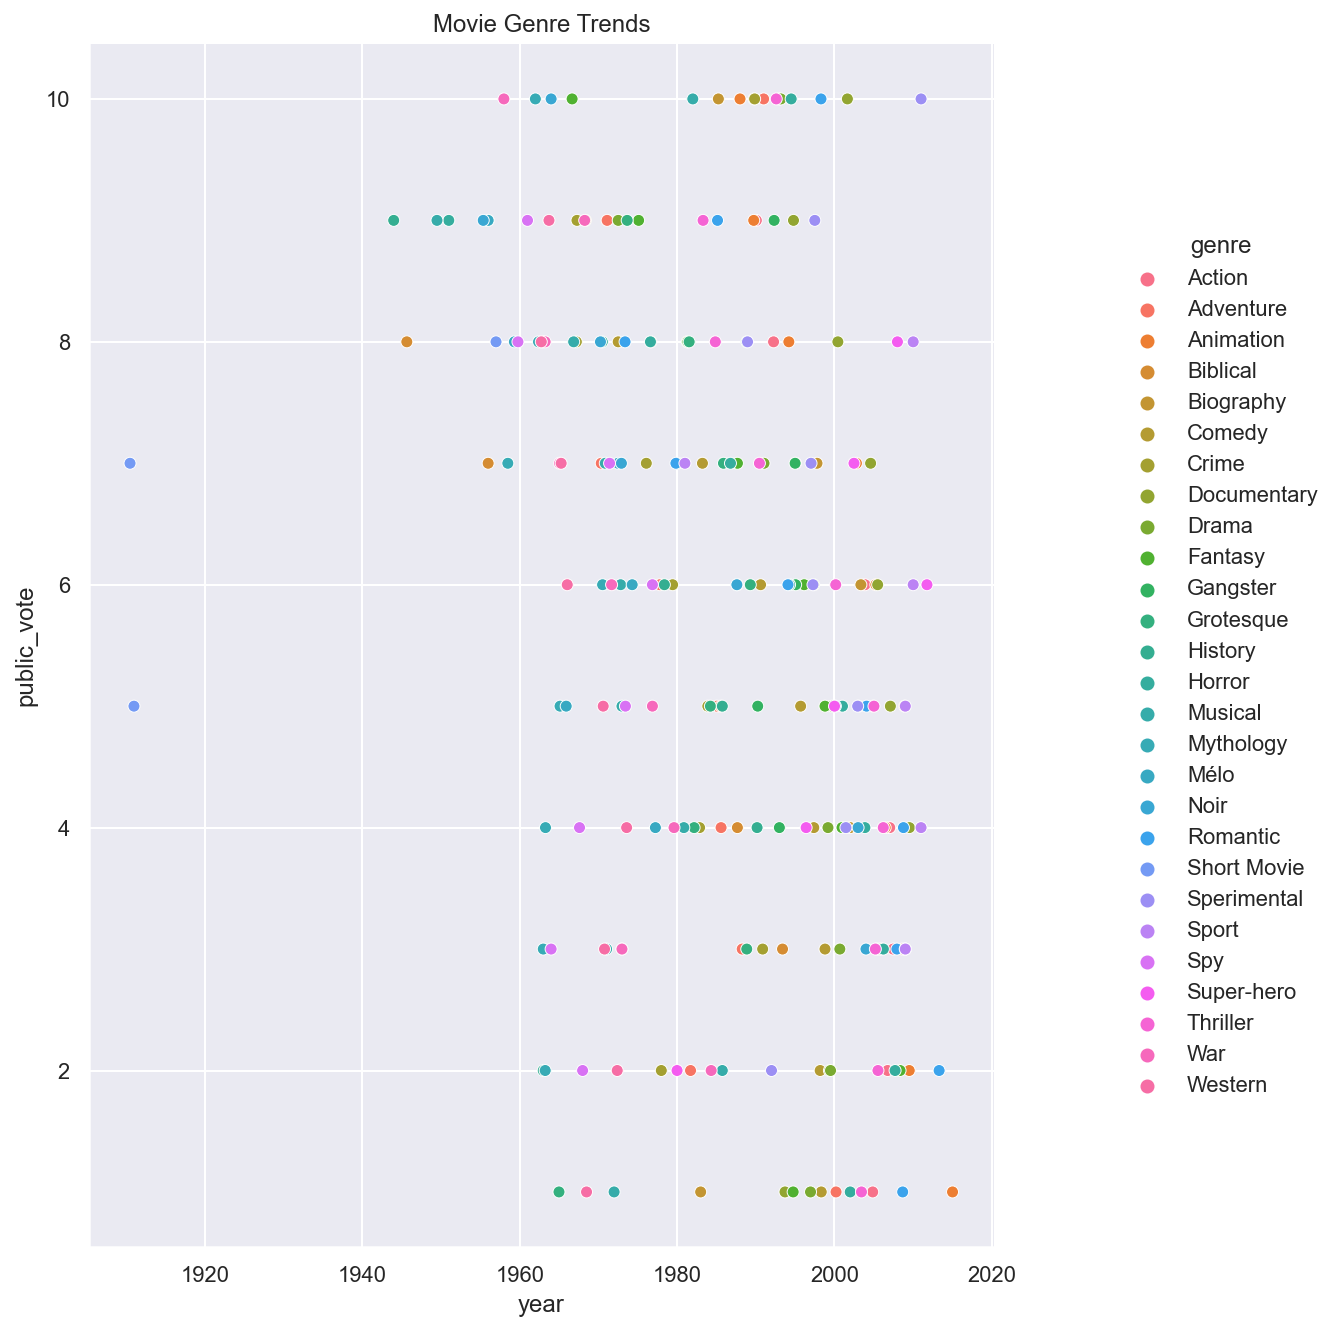

In [16]:
g=sns.relplot(kind='scatter', y='public_vote', x='year', hue='genre', data=genre_yearly)
g.fig.set_size_inches(10,10)
plt.title('Movie Genre Trends')

**Visualisation 4:** This plot takes into consideration critics' opinions on the genres. It's indicated by the heatmap that some genres are not as popular: Biblical, Mythological, Short Movies and Spy did not get significant evaluations, while genres such Drama and Comedy are highly taken into consideration.

In [17]:
#Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. 
#Common values or higher activities are represented by brighter colors,
#Darker colors are used and to represent less common or activity values.

by_critic = (dataset
            .groupby('critics_vote')
            .filter(lambda x : len(x) > 500)
            .groupby(['critics_vote', 'genre'])
            .size()
            .unstack()
           )
by_critic

genre,Action,Adventure,Animation,Biblical,Biography,Comedy,Crime,Documentary,Drama,Fantasy,...,Noir,Romantic,Short Movie,Sperimental,Sport,Spy,Super-hero,Thriller,War,Western
critics_vote,,,,,,,,,,,,,,,,,,,,,
2.0,67.0,28.0,11.0,1.0,8.0,154.0,2.0,14.0,135.0,33.0,...,NaN,12.0,NaN,NaN,1.0,4.0,NaN,72.0,1.0,31.0
3.0,64.0,87.0,10.0,1.0,8.0,291.0,11.0,12.0,164.0,34.0,...,1.0,14.0,NaN,1.0,NaN,13.0,NaN,65.0,7.0,50.0
4.0,299.0,222.0,52.0,7.0,45.0,926.0,48.0,53.0,738.0,131.0,...,7.0,88.0,NaN,6.0,NaN,32.0,3.0,370.0,34.0,144.0
4.5,47.0,17.0,11.0,2.0,12.0,156.0,3.0,8.0,130.0,20.0,...,1.0,2.0,NaN,NaN,NaN,2.0,1.0,32.0,7.0,14.0
5.0,121.0,49.0,32.0,3.0,45.0,447.0,16.0,62.0,424.0,68.0,...,6.0,21.0,NaN,6.0,NaN,7.0,NaN,162.0,20.0,36.0
5.5,27.0,22.0,18.0,1.0,11.0,163.0,8.0,30.0,181.0,16.0,...,4.0,8.0,NaN,4.0,NaN,2.0,2.0,60.0,4.0,24.0
6.0,242.0,347.0,160.0,2.0,89.0,1221.0,88.0,270.0,1517.0,173.0,...,18.0,84.0,NaN,12.0,1.0,49.0,3.0,581.0,78.0,265.0
6.5,23.0,29.0,20.0,NaN,17.0,135.0,4.0,78.0,271.0,21.0,...,4.0,8.0,NaN,5.0,NaN,2.0,1.0,35.0,10.0,15.0
7.0,63.0,57.0,59.0,NaN,36.0,355.0,23.0,234.0,712.0,48.0,...,10.0,16.0,1.0,17.0,NaN,10.0,2.0,119.0,20.0,35.0


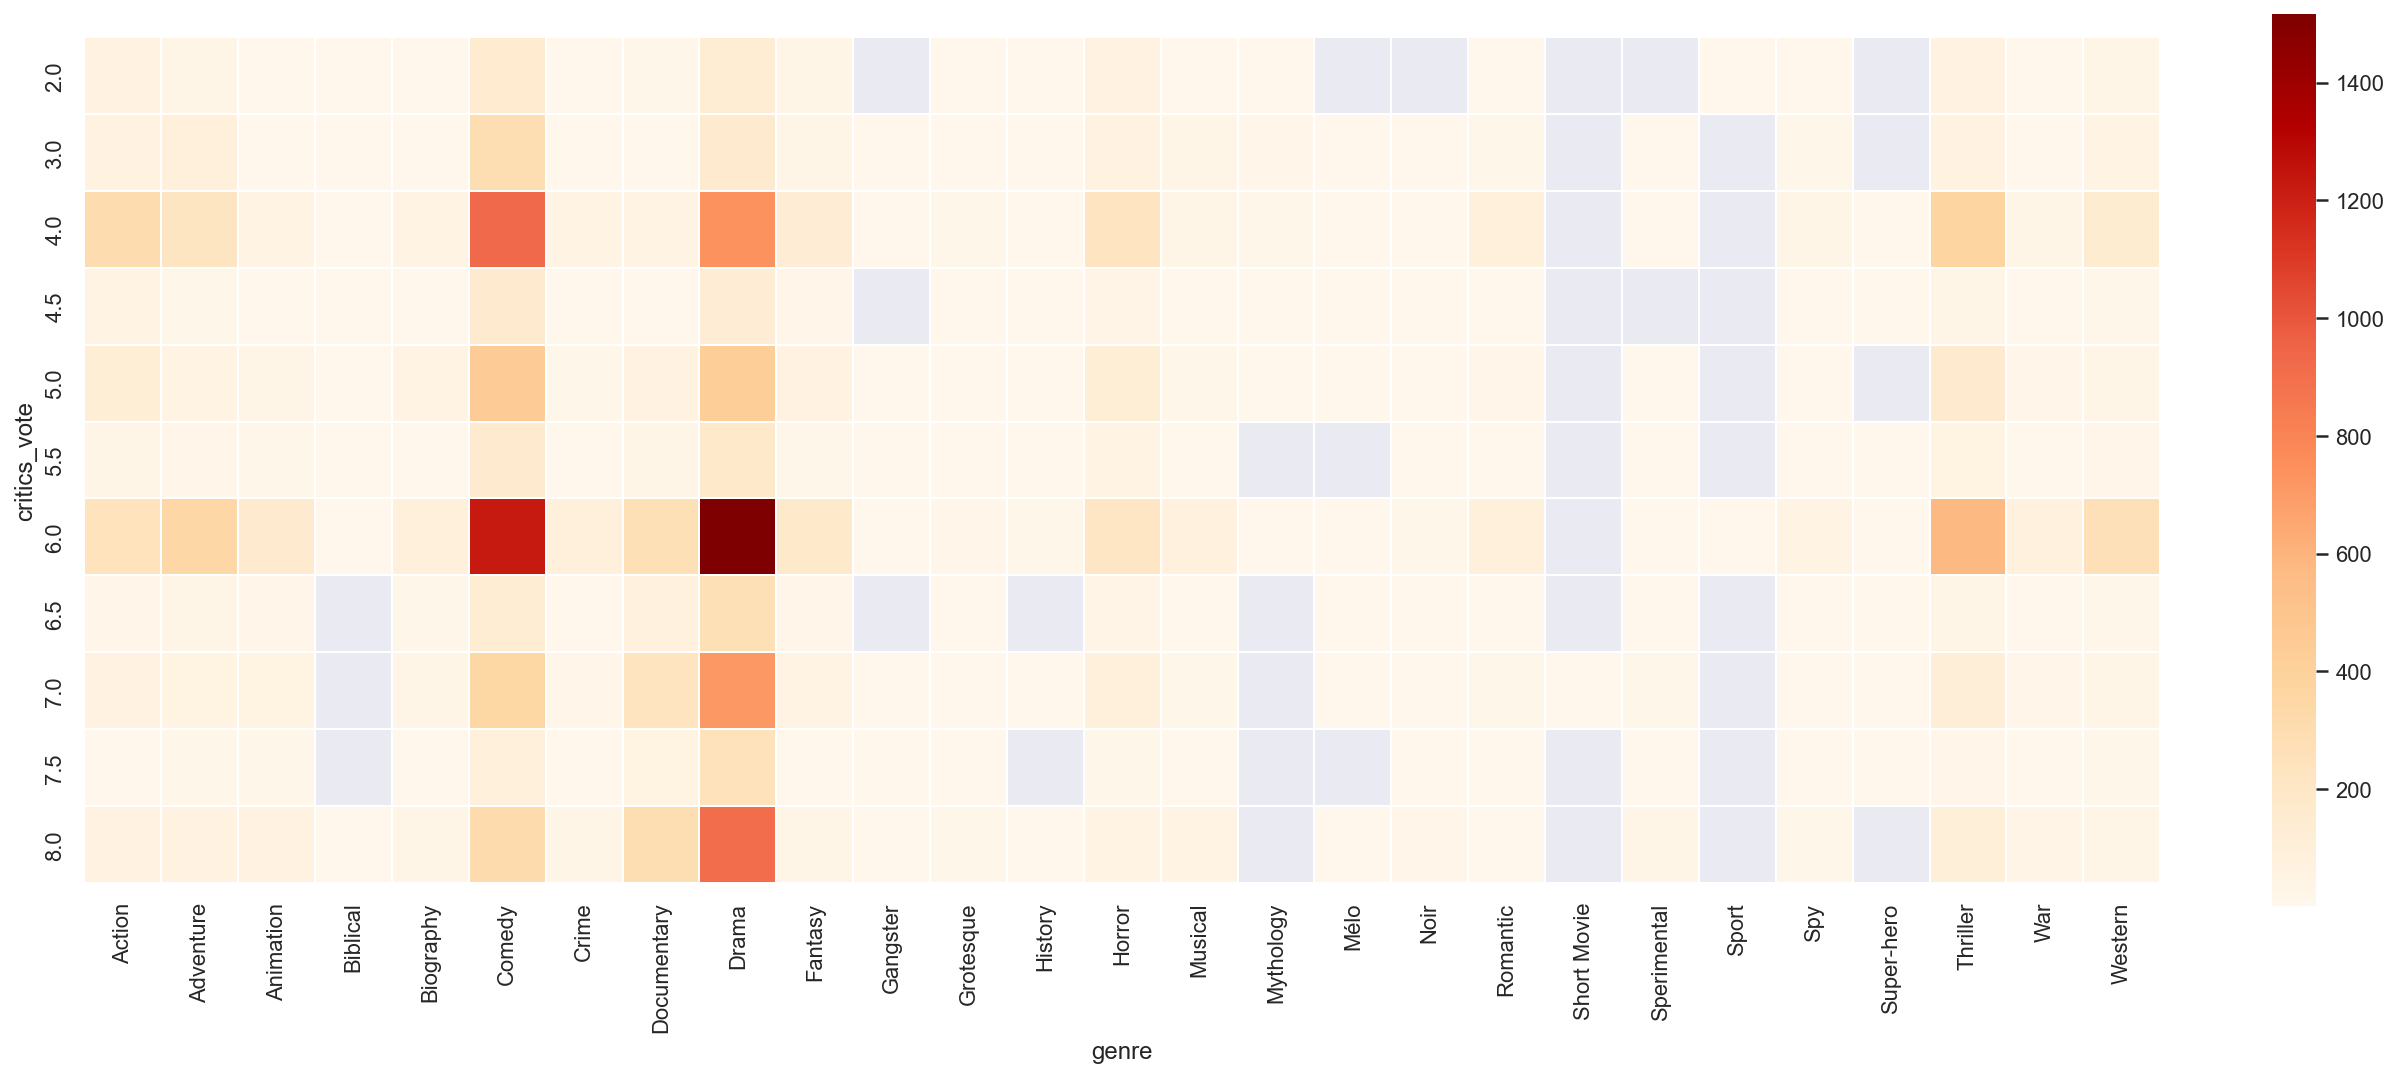

In [18]:
plt.figure(figsize=(20,20))
g = sns.heatmap(
    by_critic, 
    square=True,
    cbar_kws={'fraction' : 0.02}, 
    cmap='OrRd', 
    linewidth=1
)

**Visualisation 5:** This plot is taking into account only the works of Martin Scorcese. 
Martin Scorsese, original name Martin Marcantonio Luciano Scorsese, (born November 17, 1942, Queens, New York, U.S.), American filmmaker known for his harsh, often violent depictions of American culture.

In this plot, we can see that 'A personal Journey with Martin Scorsese thorugh American Movies, 'Good Fellas' and 'Taxi Driver' are his most acclaimed movies, with high scores. 

The least acclaimed films include 'Boxcar Bertha', 'Kundun' and 'The Color of Money'. 

In [19]:
#working specifically with one director. 
dir = dataset[dataset.directors == 'Martin Scorsese']

In [20]:
dir

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
9332,14610,A Personal Journey with Martin Scorsese Throug...,1995,Documentary,226,United States,Martin Scorsese,NaN,8.1,7.70,9.0,42,The splendor of the Hollywood studios in the g...,NaN,1,2,1,1,1
5971,9280,Goodfellas,1990,Gangster,145,United States,Martin Scorsese,"Robert De Niro, Ray Liotta, Joe Pesci, Lorrain...",8.8,8.68,9.0,631,Henry Hill tells his story as a gangster from ...,NaN,2,2,2,3,0
4558,7025,Taxi Driver,1976,Drama,110,United States,Martin Scorsese,"Robert De Niro, Cybill Shepherd, Harvey Keitel...",9.1,9.34,9.0,727,Travis is a Vietnam veteran marked by the war ...,Palme d'Or in Cannes is the film that Scorsese...,0,2,3,3,1
6589,10262,Cape Fear,1991,Thriller,118,United States,Martin Scorsese,"Robert De Niro, Nick Nolte, Jessica Lange, Jul...",7.6,7.71,8.0,387,Max Cady (De Niro) got fourteen years in priso...,NaN,1,3,1,4,1
19921,35913,The Departed,2006,Gangster,151,United States,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",7.8,7.75,8.0,722,Boston: Recruit Billy Costigan is infiltrated ...,A daily nightmare where everything comes toget...,1,4,4,4,2
6404,9959,Raging Bull,1980,Drama,128,United States,Martin Scorsese,"Robert De Niro, Joe Pesci, Cathy Moriarty, Fra...",8.6,8.84,8.0,447,Jake La Motta grew up in the Bronx Italian-Ame...,NaN,1,3,2,3,1
5327,8234,Mean Streets,1973,Drama,110,United States,Martin Scorsese,"Robert De Niro, Harvey Keitel, Amy Robinson, D...",7.8,7.87,8.0,258,Johnny Boy is a messed-up thug who piles up de...,"Granguignolesca, an extraordinary reconstructi...",1,3,2,3,1
4884,7492,The Last Waltz,1978,Musical,117,United States,Martin Scorsese,"Bob Dylan, Van Morrison, Eric Clapton, Neil Yo...",8.3,8.29,8.0,39,For sixteen years they have trod the most impo...,Martin Scorsese resumes the concert by buildin...,0,3,2,0,0
22445,40510,Shutter Island,2009,Noir,138,United States,Martin Scorsese,"Leonardo DiCaprio, Mark Ruffalo, Ben Kingsley,...",7.2,6.91,8.0,644,Two federal inspectors are sent to a psychiatr...,"A non-sparkling Scorsese, still capable of off...",0,3,3,4,0
22873,41224,American Boy: A Profile of Steven Prince,1978,Documentary,55,United States,Martin Scorsese,"Steven Prince, Martin Scorsese, George Memmoli...",7.0,6.00,8.0,3,Scorsese's documentary film about Steven Princ...,NaN,0,0,0,0,0


<BarContainer object of 36 artists>

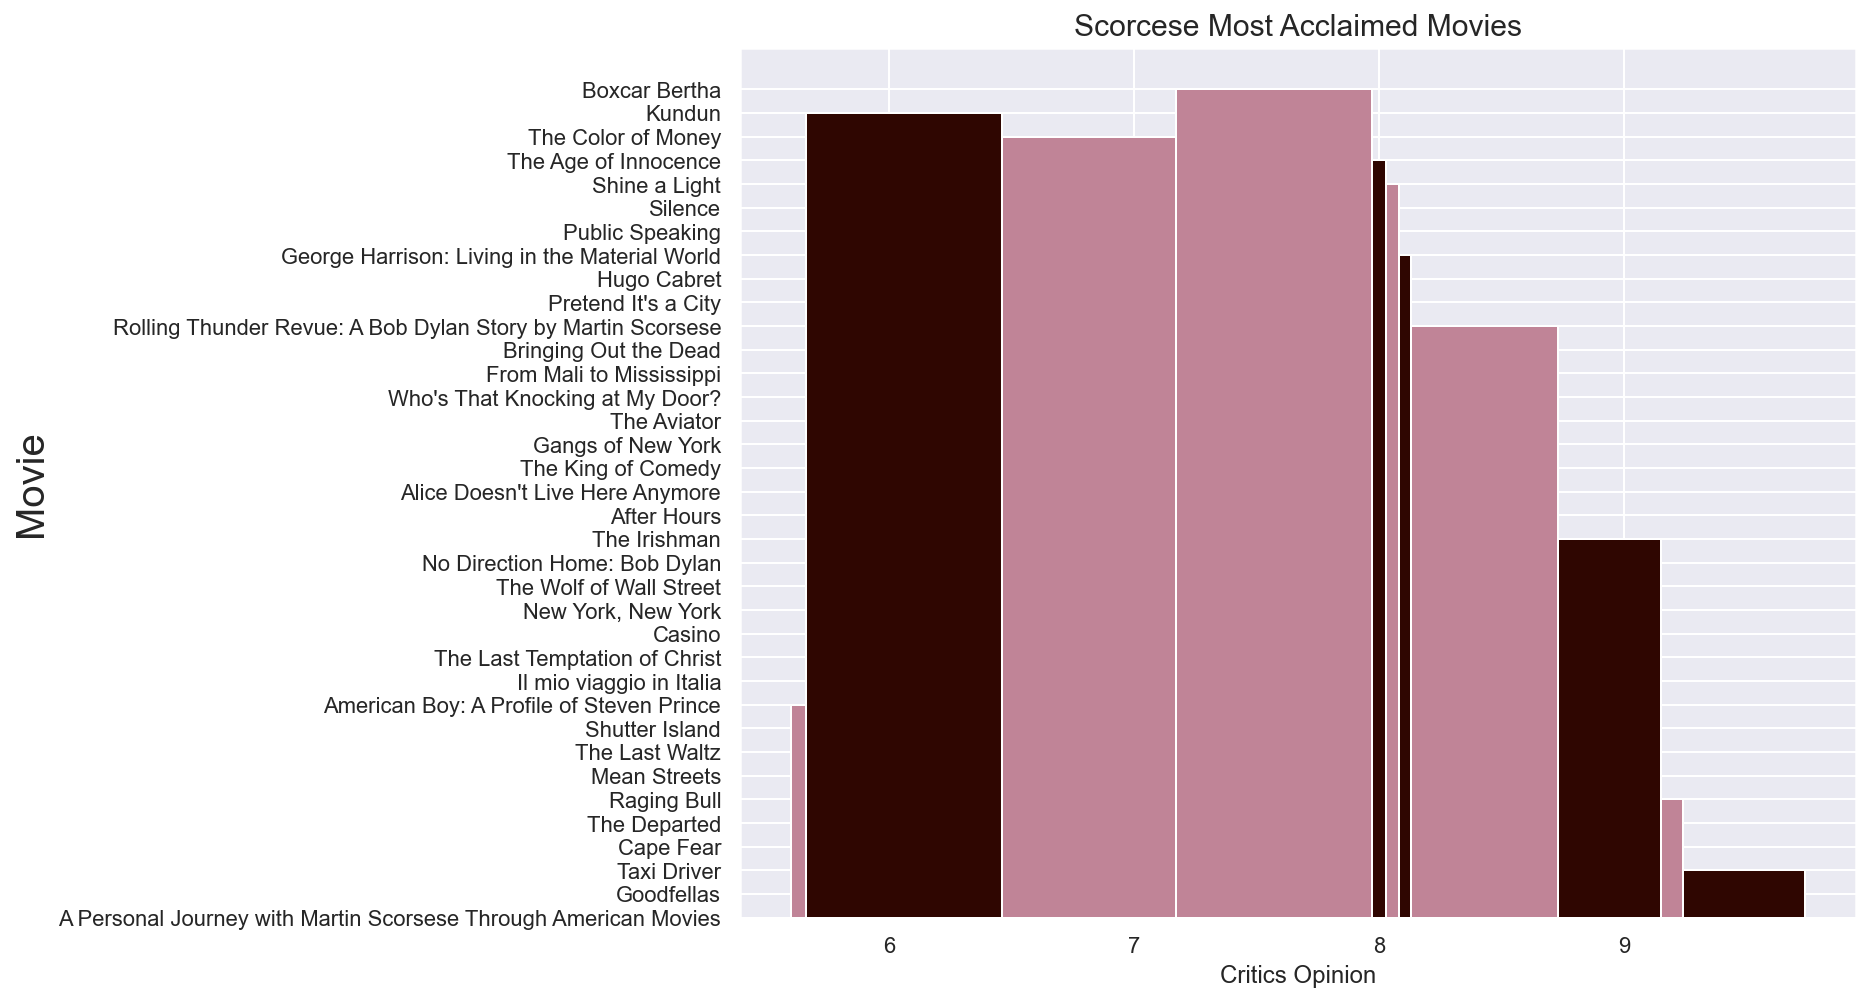

In [21]:
plt.figure(figsize=(10,8))
plt.ylabel('Movie', fontsize = 20)
plt.xlabel('Critics Opinion')
plt.title('Scorcese Most Acclaimed Movies', fontsize = 15)
plt.bar(dir.critics_vote,dir.title, color=['#2F0601', '#C08497'])

**Visualisation 6:** This plot shows the relation between the duration of the movies and the genre. The plot shows that drama and biography movies are the longest movies and movie in the Animation genre tend to be shorter.  

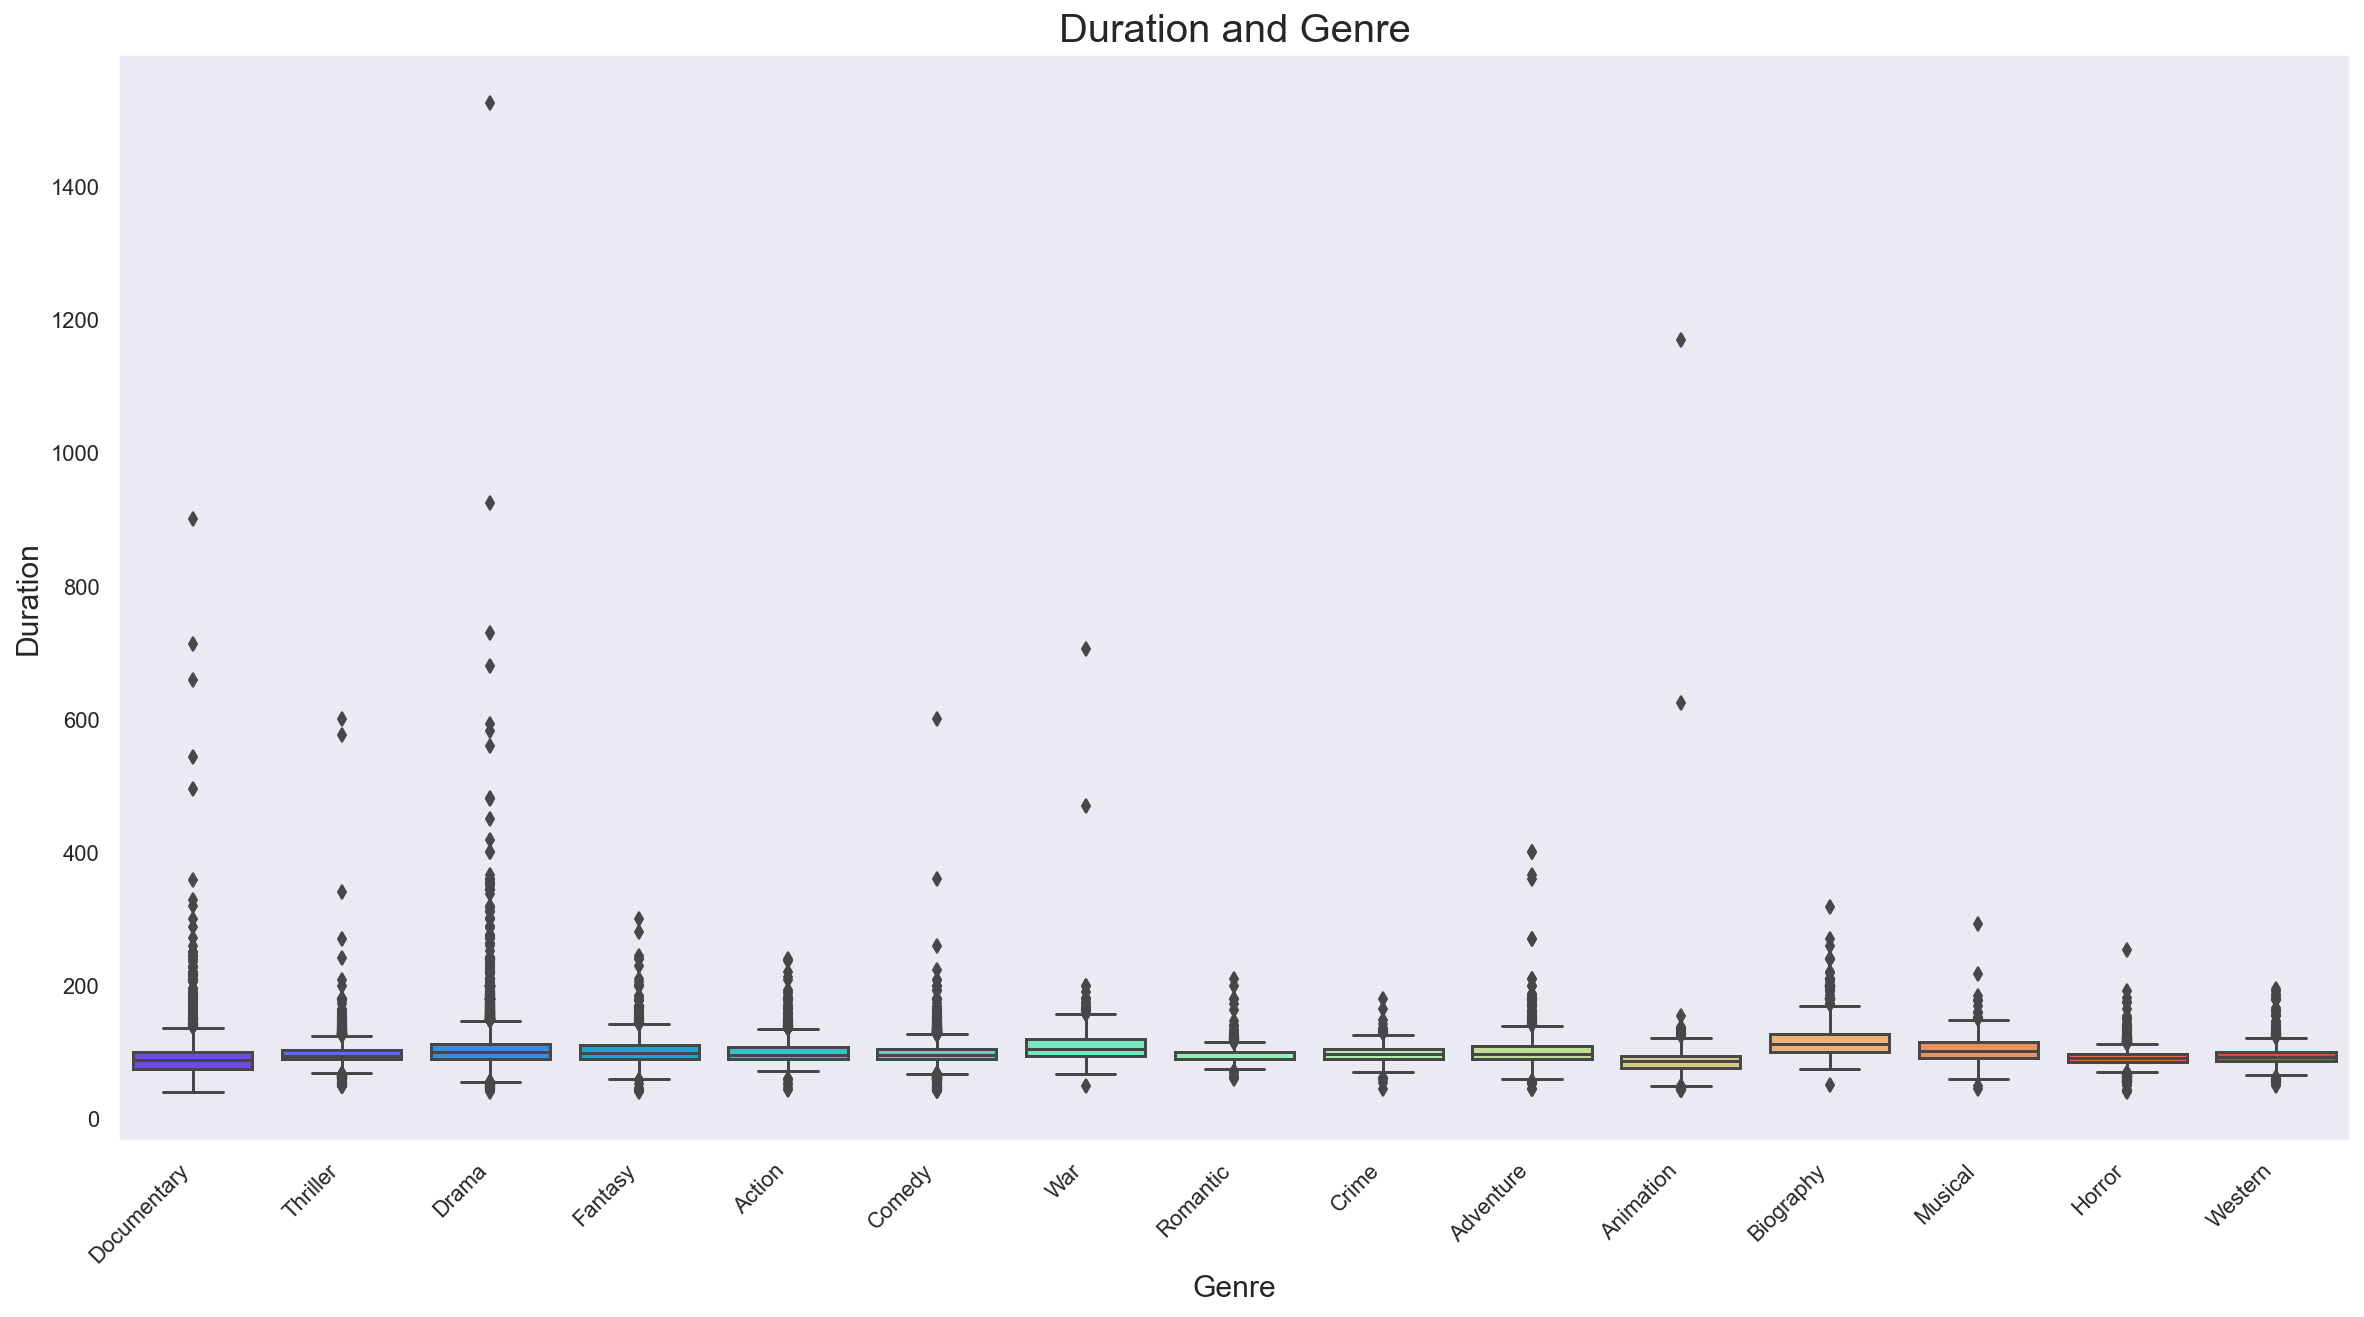

In [22]:
sns.set(style='dark')
plt.figure(figsize=(20, 10))
plt.title('Duration and Genre', fontsize=20)
ax = sns.boxplot(data=dataset[dataset['genre'].isin(dataset['genre'].value_counts()[:15].index.tolist())],
                 x='genre', y='duration', palette='rainbow')
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Duration', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()

# Additional Plots


In [23]:
country = dataset[dataset.country == 'Ireland']

In [24]:
country

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
10412,16420,"The Sun, the Moon and the Stars",1996,Comedy,90,Ireland,Geraldine Creed,"Angie Dickinson, Elaine Cassidy, Jason Donovan...",8.0,6.00,10.0,3,"Monica O'Brien, a woman separated from her hus...",NaN,2,2,0,1,0
23522,42594,Kisses,2008,Drama,72,Ireland,Lance Daly,"Kelly O'Neill, Shane Curry, Paul Roe, Neilí Co...",8.3,9.00,8.0,4,Kylie (Kelly O'Neill) has to make up for her p...,"Lance Daly, the name of the Irish independent ...",1,1,1,0,0
27174,54113,Moving Target,2000,Action,86,Ireland,Paul Ziller,"Don 'The Dragon' Wilson, Hillary Kavanagh, Bil...",8.0,NaN,8.0,3,"Ray Brock (Don ""The Dragon Wilson"") martial ar...",NaN,0,0,0,0,0
34034,146225,Kissing Candice,2017,Drama,102,Ireland,Aoife McArdle,"Ann Skelly, Ryan Lincoln, Conall Keating, Ryan...",6.8,NaN,7.0,4,17-year-old Candice is a dreamer and the dream...,NaN,0,0,0,0,0
32782,128307,The Young Offenders,2016,Comedy,84,Ireland,Peter Foott,"Alex Murphy, Chris Walley, Hilary Rose, Domini...",7.1,7.00,7.0,9,"Conor and Jock, two untrustworthy teenage frie...",Inspired by the true story of Ireland's larges...,0,0,0,0,0
33329,138936,Black 47,2018,Drama,96,Ireland,Lance Daly,"Hugo Weaving, James Frecheville, Sarah Greene,...",7.1,7.00,7.0,10,1847. Ireland is in the grip of the great fami...,NaN,0,0,0,0,0
33161,137205,Bad Day for the Cut,2017,Drama,99,Ireland,Chris Baugh,"Nigel O'Neill, Susan Lynch, Józef Pawlowski, S...",6.6,NaN,7.0,9,A middle-aged Irish farmer still lives at home...,NaN,0,0,0,0,0
12029,19188,Agnes Browne,1999,Comedy,91,Ireland,Anjelica Huston,"Anjelica Huston, Marion O'Dwyer, Niall O'Shea,...",6.6,6.57,7.0,33,"1967, Ireland. The Browne family live in a tur...","The daughter of the unforgettable John, in add...",2,2,2,1,0
36795,184255,Arracht,2019,Drama,86,Ireland,"Tom Sullivan, Tomás Ó Súilleabháin","Dónall Ó Héalai, Saise Ní Chuinn, Dara Devaney...",7.0,7.00,7.0,4,"In Ireland in 1845, a farmer and fisherman nam...",NaN,0,0,0,0,0
35678,165913,Shooting the Mafia,2019,Documentary,97,Ireland,Kim Longinotto,Letizia Battaglia,7.5,8.00,7.0,5,The Sicilian Letizia Battaglia has fought the ...,NaN,0,0,0,0,0


<BarContainer object of 42 artists>

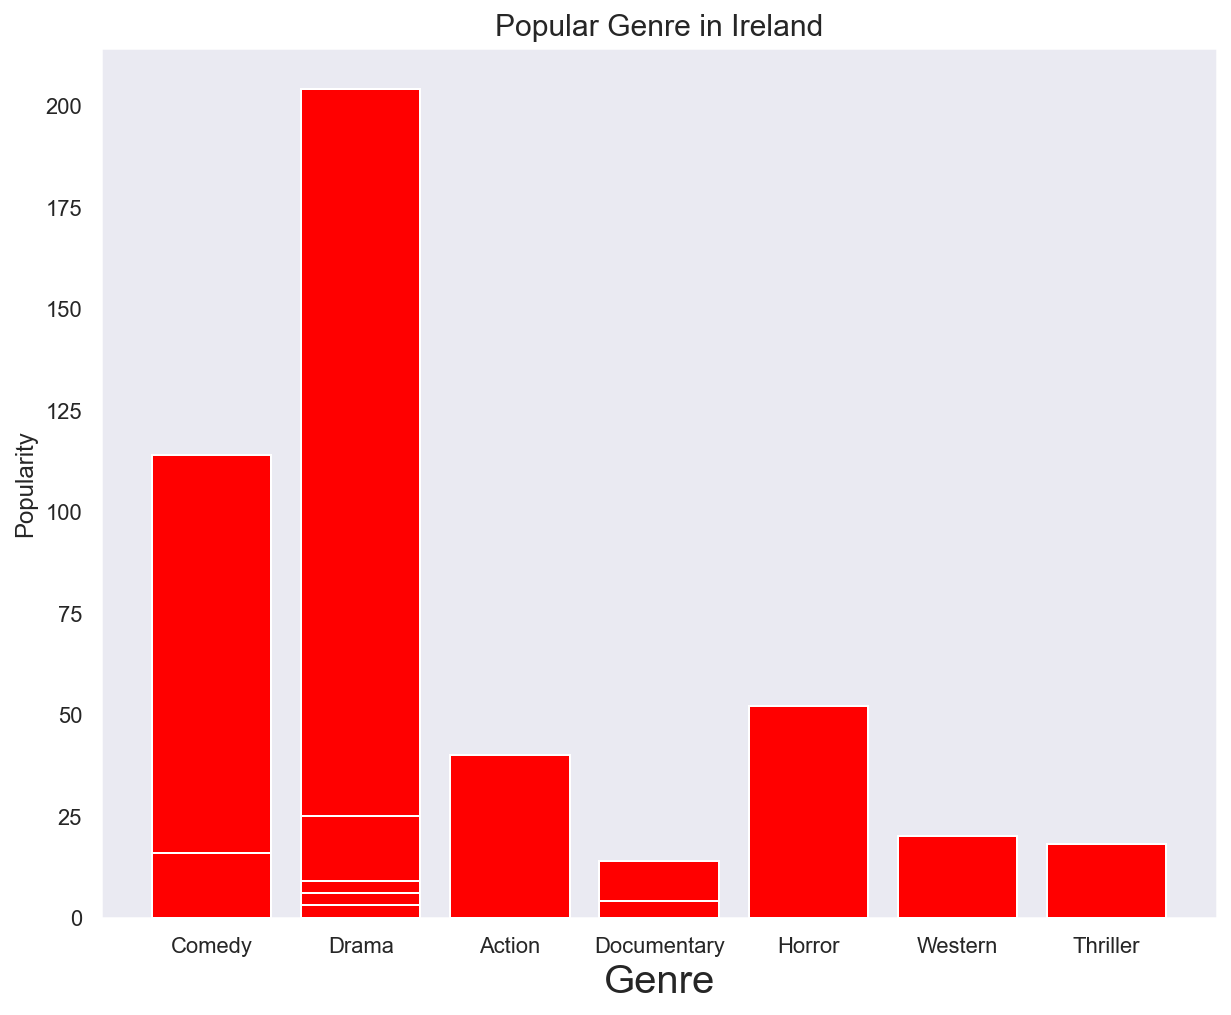

In [25]:
plt.figure(figsize=(10,8))
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Popularity')
plt.title('Popular Genre in Ireland', fontsize = 15)
plt.bar(country.genre,country.total_votes, color='red')

In [37]:
dataset.corr()['year']


filmtv_id       0.583116
year            1.000000
duration        0.059000
avg_vote       -0.248912
critics_vote   -0.168779
public_vote    -0.249307
total_votes     0.059529
humor          -0.158181
rhythm         -0.316882
effort         -0.094326
tension        -0.275178
erotism        -0.082143
Name: year, dtype: float64

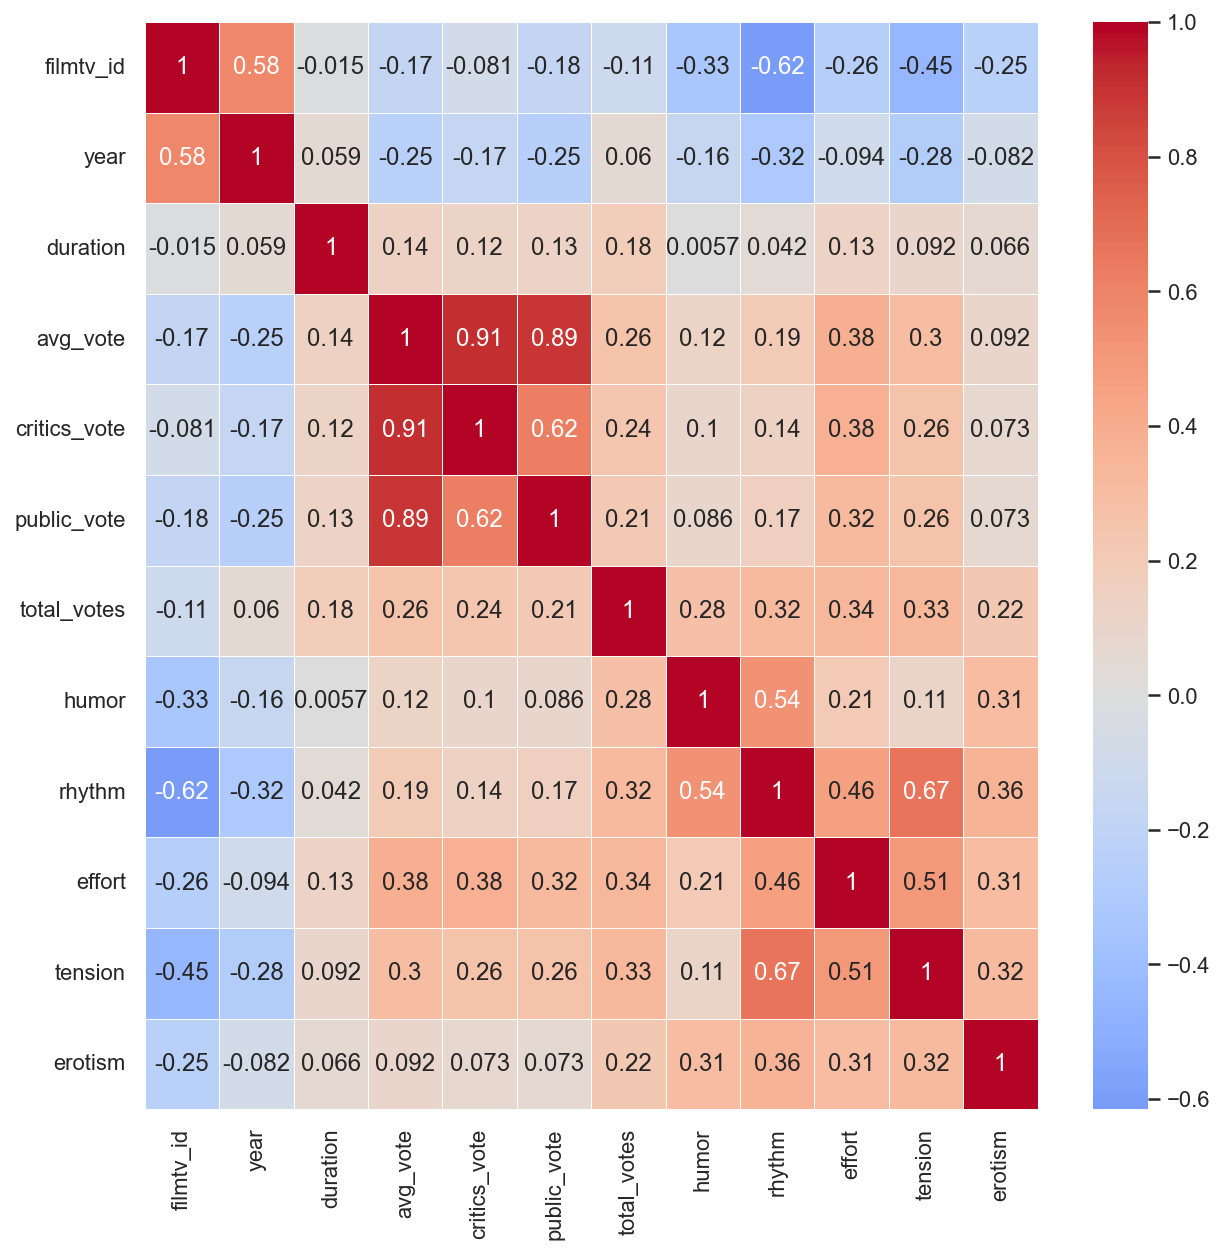

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

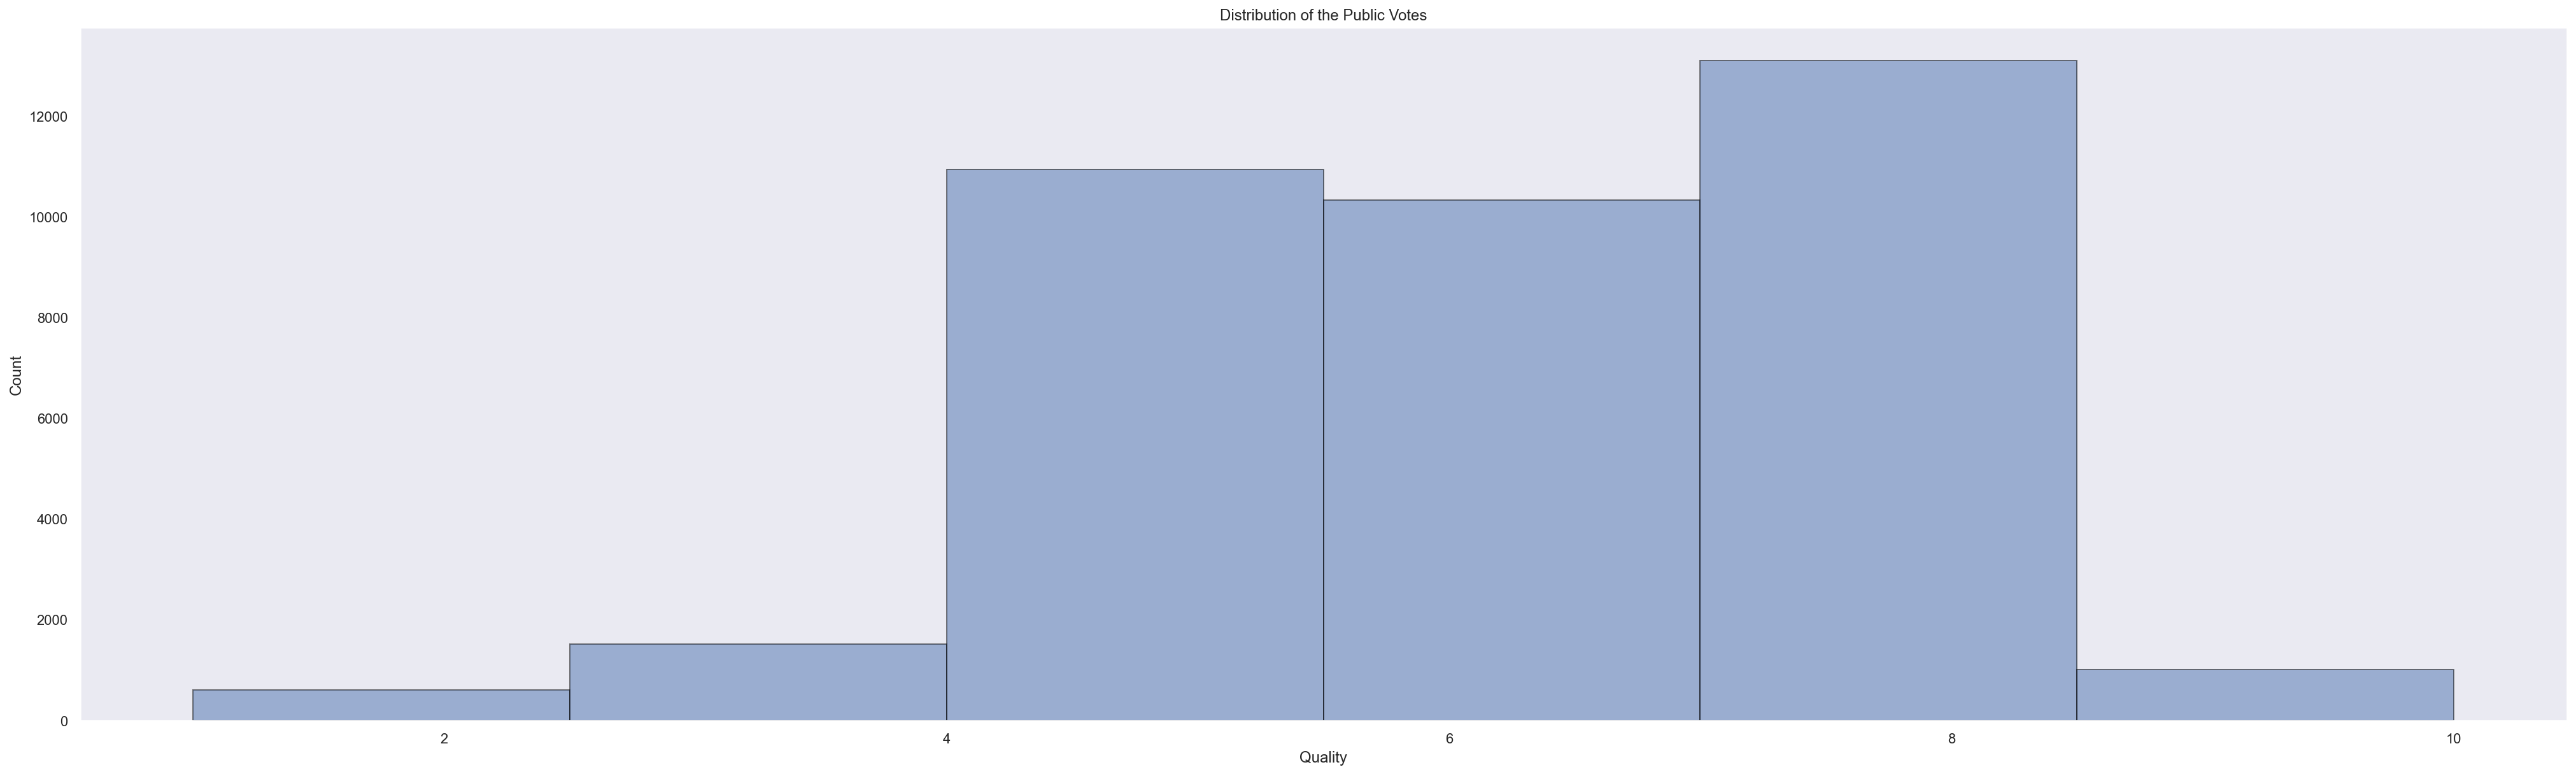

In [39]:
plt.hist(dataset.public_vote,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Public Votes')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

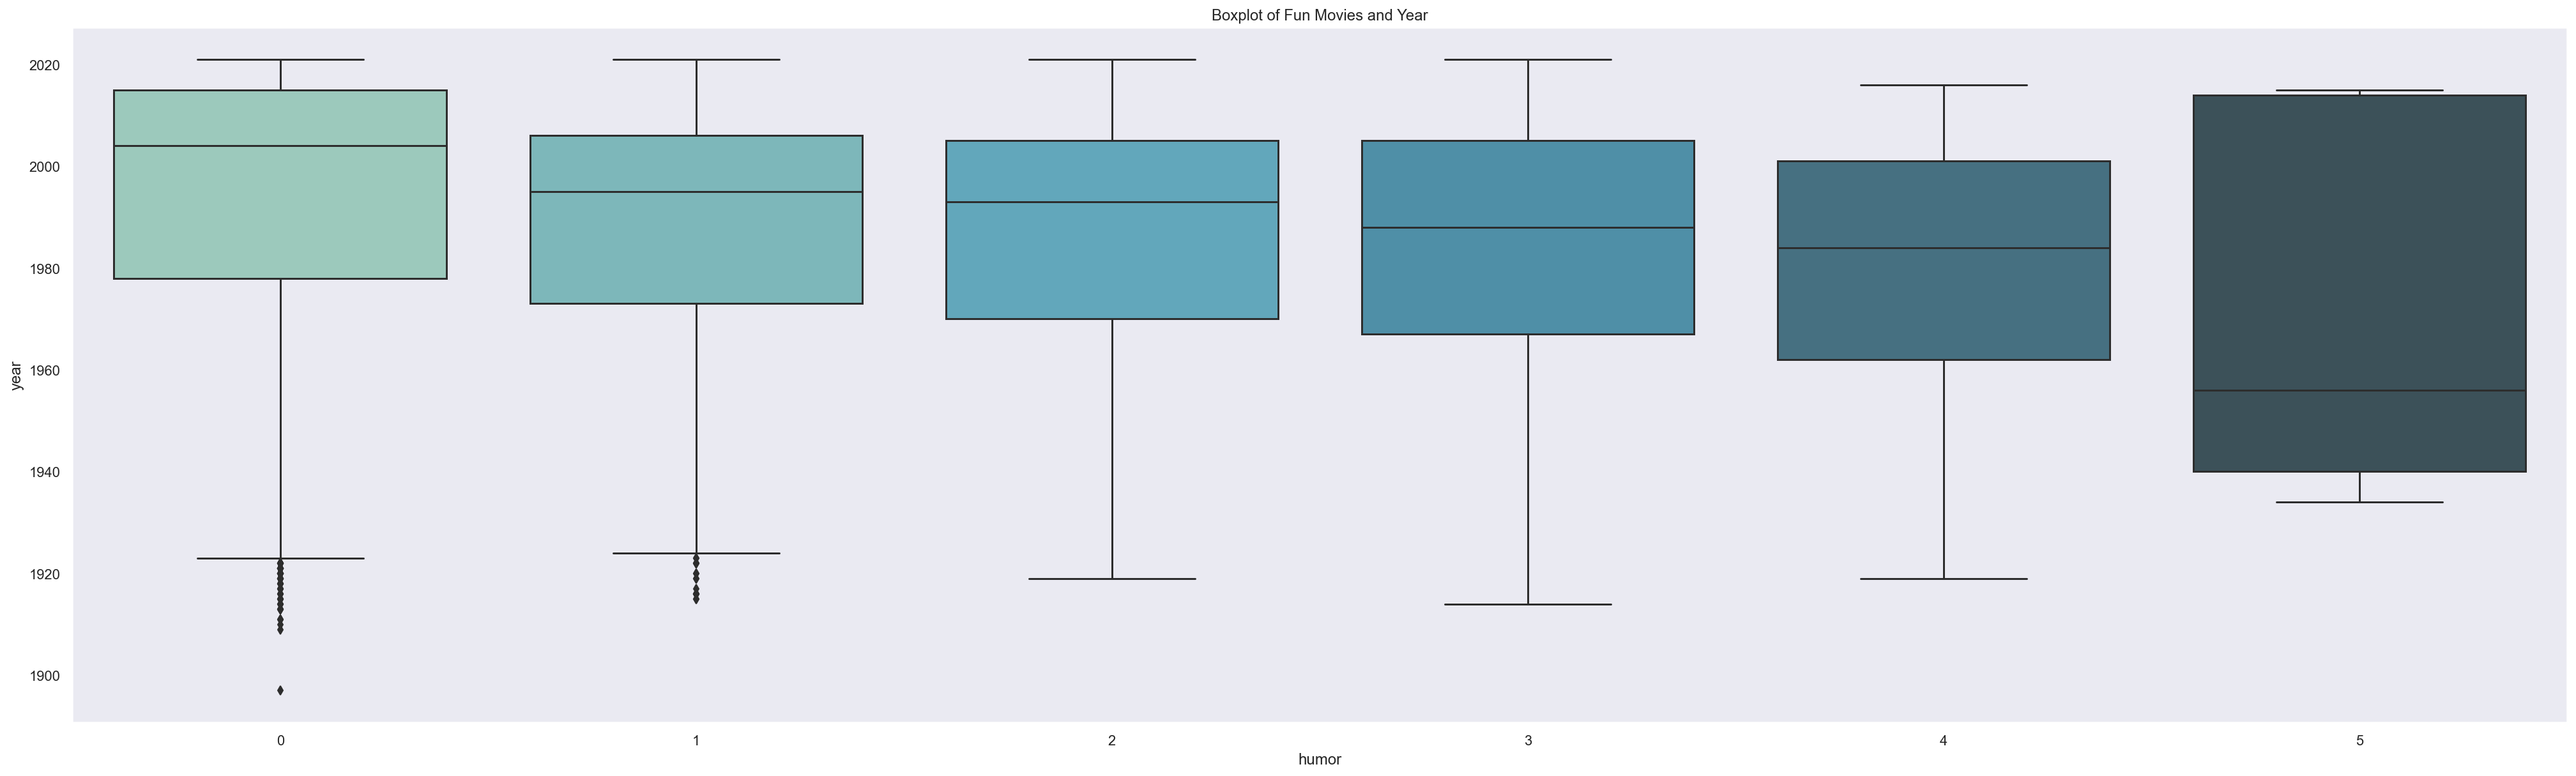

In [40]:
sns.boxplot(x='humor',y='year',data=dataset,palette='GnBu_d')
plt.title("Boxplot of Fun Movies and Year")
plt.show()

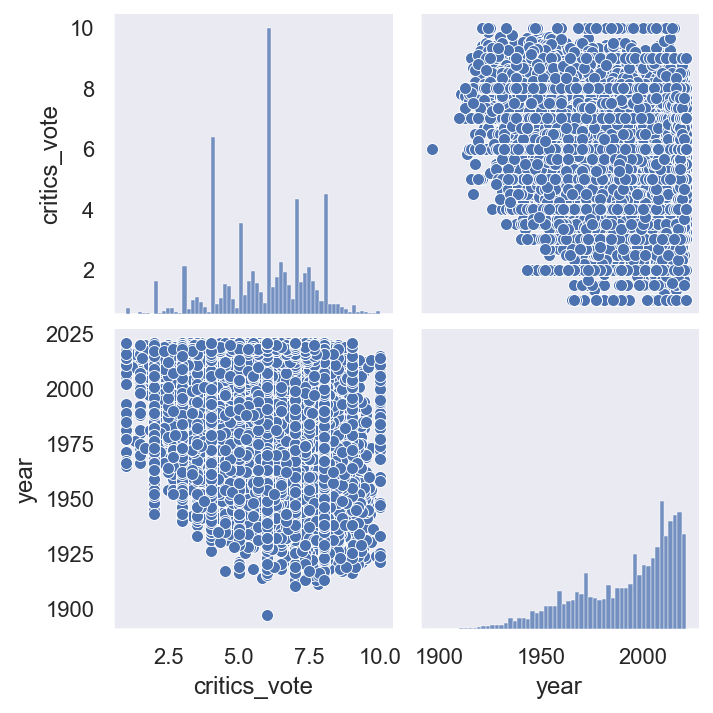

In [41]:
yc= dataset.loc[:,["critics_vote","year"]]
sns.pairplot(yc)
plt.show()